# Custom Chat Backend for ChatNoir Chat

This Tutorial shows how you can connect custom chat backends to ChatNoir Chat.
This is useful to run LLMs that can not be shared in the public or to experiment with diverse generative IR pipelines where you can make minor adjustments to the pipeline directly in Colab but you still have all the flexibility (e.g., models/outputs from TIREx).



### Step 1: Install Dependencies

In [1]:
!pip install git+https://github.com/chatnoir-eu/chatnoir-api

  Cloning https://github.com/chatnoir-eu/chatnoir-api to /tmp/pip-req-build-gci59wwv
  Running command git clone --filter=blob:none --quiet https://github.com/chatnoir-eu/chatnoir-api /tmp/pip-req-build-gci59wwv
  Resolved https://github.com/chatnoir-eu/chatnoir-api to commit 5afe6d918b3dfa86579584d80f2888de5cc72a36
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.1 MB/s eta 0:00:00
  Created wheel for chatnoir-api: filename=chatnoir_api-2.1.10.dev6+g5afe6d9-py3-none-any.whl size=20111 sha256=0184e9c50f1eeefd7817f4bb9f9f593d28d730ba943f9a48aff480cdffb18a6a
  Stored in directory: /tmp/pip-ephem-wheel-cache-vjlyc9vv/wheels/01/d0/d3/bc82c562ac971bb06351cf13693a20123b65922c19e3138b72
Successfully built chatnoir-api
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 6.8.0
    Uninstalling importlib-meta

### Step 2: Get your Backend Authentication Key

Please click on "Add new Backend" to connect your custom chat/llm backend via websockets to ChatNoir Chat.

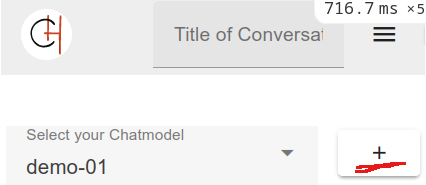

This will open a new window where you can copy-and paste the code (including the authentication key for your backend) to connect your custom backend:

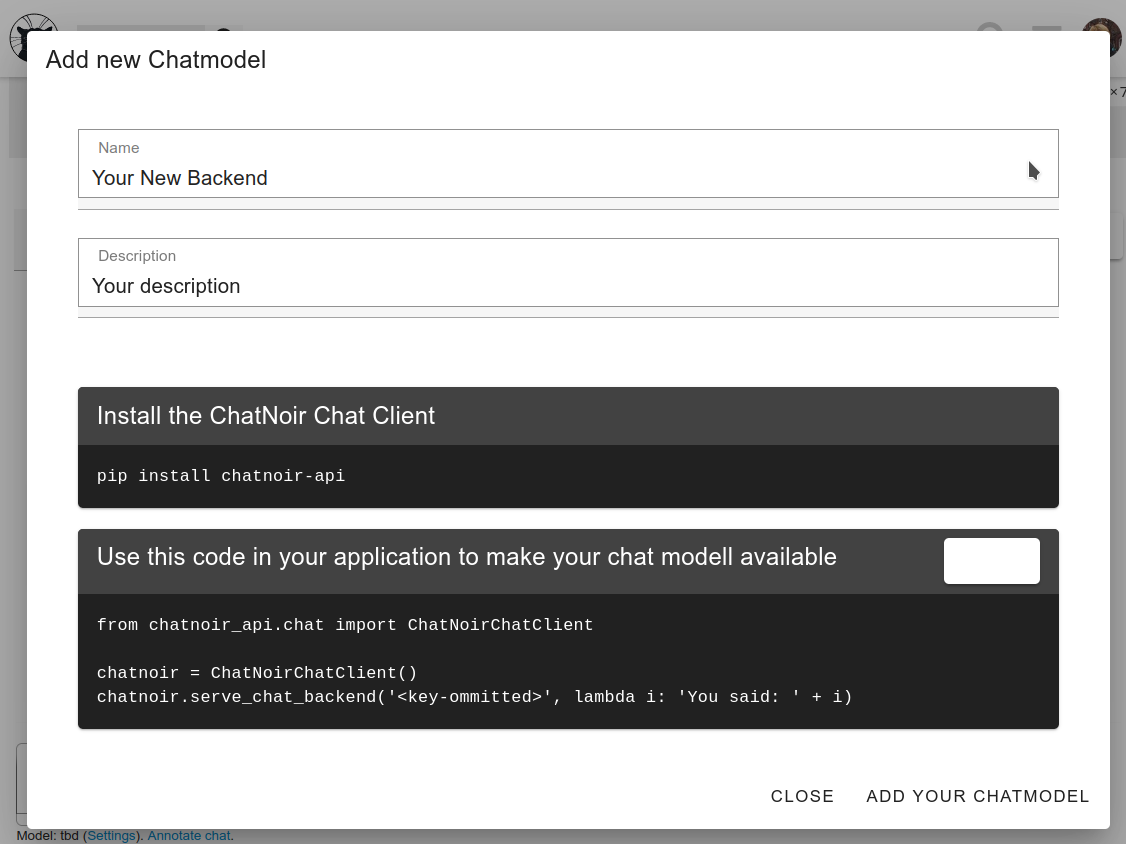

### Step 2: Implement a Chat Backend

We will implement 2 backends that we will compare in a simple scenario for two questions about Olaf Scholz:

- variant 1: passes the user request without modification to alpaca-en-7b.
- variant 2: A model that uses the first sentence of the Wikipedia Article of Olaf Scholz as Context (simulating that this was retrieved by some model)

In [2]:
from chatnoir_api.chat import ChatNoirChatClient

chatnoir = ChatNoirChatClient()

ChatNoir Chat uses ws_host from environment Environment variable
ChatNoir Chat uses API key from Environment variable
ChatNoir Chat uses model 'alpaca-en-7b' from Environment variable
ChatNoir Chat uses endpoint 'https://chat.web.webis.de/' from {endpoint[1]}


In [7]:
chatnoir.chat('how are you?')

"I'm doing well, thank you for asking. How about you?"

In [3]:
# Variant 1: Without context
variant_1 = lambda i: chatnoir.chat(i)

# Variant 2: Use the first sentence of the Wikipedia article of Olaf Scholz as Context (simulating that this was retrieved by some other stage)
variant_2 = lambda i: chatnoir.chat("Context: Olaf Scholz (born 14 June 1958) is a German politician who has been serving as the chancellor of Germany since 8 December 2021. Question: " + i)

In [8]:
chatnoir.serve_chat_backend('56f0150f-d1c6-4181-8265-9e163c75d9e9', variant_1)

Will connect to wss://chatsocket.web.webis.de
Done. Connected to wss://chatsocket.web.webis.de


When we run the cell above, we ask two questions about Olaf Scholz, both answers are wrong:

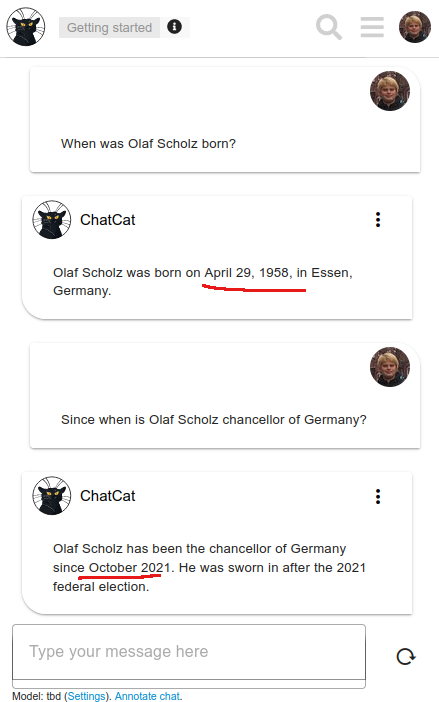

Now we compare this to the variant 2 that uses some context for alpaca-en-7b.

In [9]:
chatnoir.serve_chat_backend('56f0150f-d1c6-4181-8265-9e163c75d9e9', variant_2)

Will connect to wss://chatsocket.web.webis.de
Done. Connected to wss://chatsocket.web.webis.de


Both answers are now correct with the context. Even when this is cherry picked, it highlights how new chat backends/llms/generative IR pipelines can be connected.

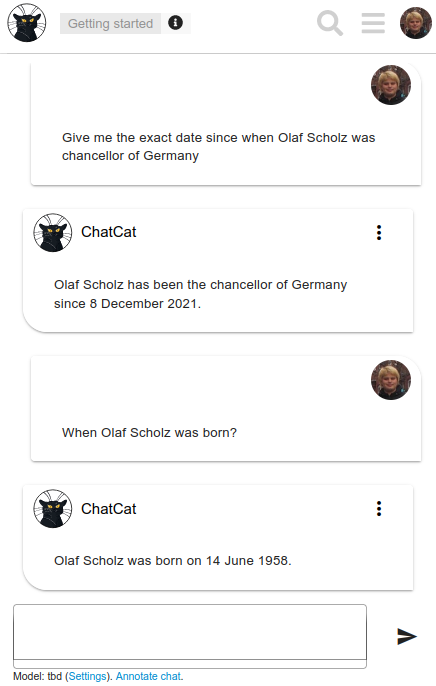

### Backup Examples

In [ ]:
variant_1("When was Olaf Scholz born?")

'Olaf Scholz was born on April 29, 1958, in Essen, Germany.'

In [ ]:
variant_1("Give me the date when Olaf Scholz became chancellor?")

'Olaf Scholz became chancellor of Germany on October 27, 2021.'

In [ ]:
variant_2("When was Olaf Scholz born?")

'Olaf Scholz was born on 14 June 1958.'

In [ ]:
variant_2("Give me the date when Olaf Scholz became chancellor?")

'Olaf Scholz became chancellor of Germany on 8 December 2021.'